#**Electricity Consumption Analysis**

**Task 1 — EDA**

/tmp/ipython-input-1401761379.py:17: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


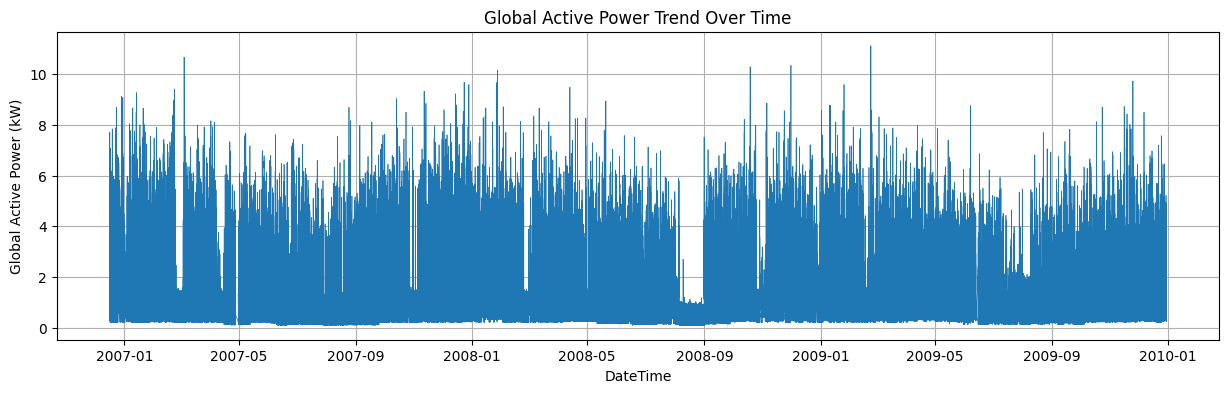

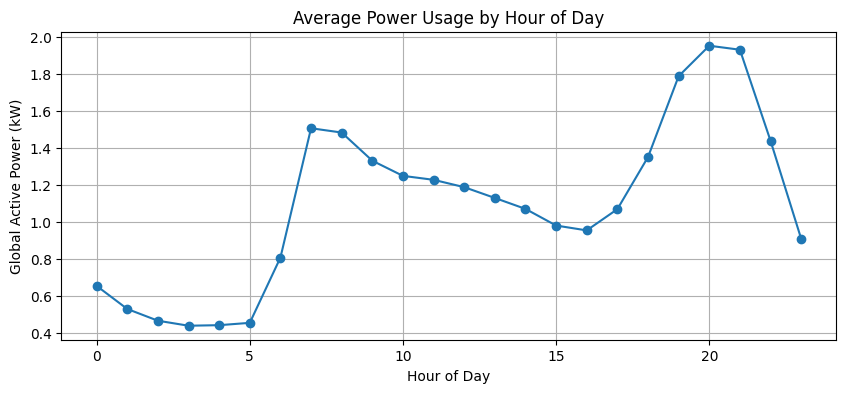

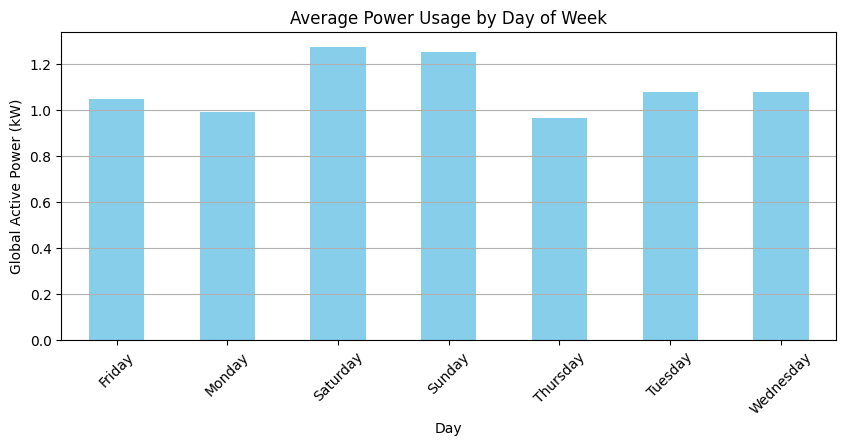


📌 Task 1 Completed: Trends + Hourly & Daily Usage Patterns Visualized Successfully!


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)



df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df['Global_active_power'] = df['Global_active_power'].astype(float)


df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.sort_values('DateTime')


plt.figure(figsize=(15,4))
plt.plot(df['DateTime'], df['Global_active_power'], linewidth=0.5)
plt.title("Global Active Power Trend Over Time")
plt.xlabel("DateTime")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.show()


df['Hour'] = df['DateTime'].dt.hour
plt.figure(figsize=(10,4))
df.groupby('Hour')['Global_active_power'].mean().plot(kind='line', marker='o')
plt.title("Average Power Usage by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.show()


df['Day'] = df['DateTime'].dt.day_name()
plt.figure(figsize=(10,4))
df.groupby('Day')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Power Usage by Day of Week")
plt.xlabel("Day")
plt.ylabel("Global Active Power (kW)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("\n📌 Task 1 Completed: Trends + Hourly & Daily Usage Patterns Visualized Successfully!")


**Task 2 — Supervised Learning (Time-Series Forecasting)**

/tmp/ipython-input-3198664618.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')['Global_active_power']


Original rows : 2049280
Hourly rows   : 34168

📌 Time-Series Forecasting Performance (Next-Hour Global_active_power)
MAE  : 0.3454
RMSE : 0.4983


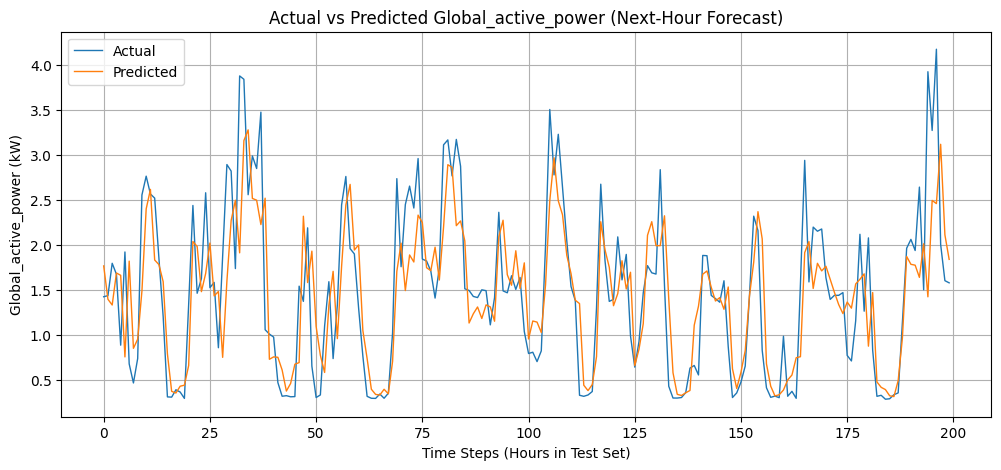


✅ Task 2 completed: timestamp combined, windowed data created, model trained & evaluated, plot generated.


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



df = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)


df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df['Global_active_power'] = df['Global_active_power'].astype(float)


df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df = df.sort_values('DateTime')


df_hourly = (
    df.set_index('DateTime')
      .resample('H')['Global_active_power']
      .mean()
      .dropna()
      .to_frame()
      .reset_index()
)

print("Original rows :", len(df))
print("Hourly rows   :", len(df_hourly))


values = df_hourly['Global_active_power'].values
X, y = [], []
window_size = 24

for i in range(window_size, len(values)):
    X.append(values[i-window_size:i])
    y.append(values[i])

X = np.array(X)
y = np.array(y)



split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation (time-series error metrics)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📌 Time-Series Forecasting Performance (Next-Hour Global_active_power)")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")



plt.figure(figsize=(12,5))
plt.plot(y_test[:200], label="Actual", linewidth=1)
plt.plot(y_pred[:200], label="Predicted", linewidth=1)
plt.title("Actual vs Predicted Global_active_power (Next-Hour Forecast)")
plt.xlabel("Time Steps (Hours in Test Set)")
plt.ylabel("Global_active_power (kW)")
plt.legend()
plt.grid(True)
plt.show()

print("\n✅ Task 2 completed: timestamp combined, windowed data created, model trained & evaluated, plot generated.")


**Task 3 — Unsupervised Learning**

/tmp/ipython-input-4051860709.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')['Global_active_power']


Hourly rows used for unsupervised learning: 34168

🔍 Anomaly Detection:
Total anomalies detected (hourly): 1023


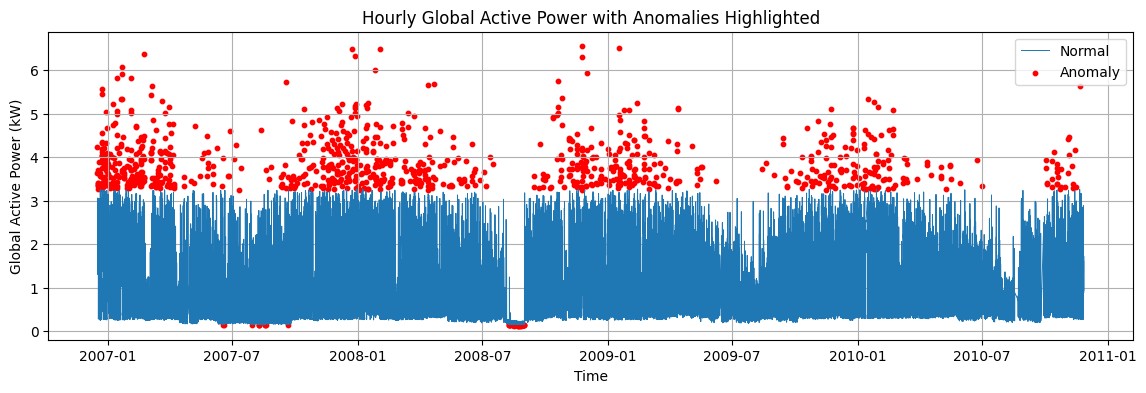


Daily rows used for clustering: 1433


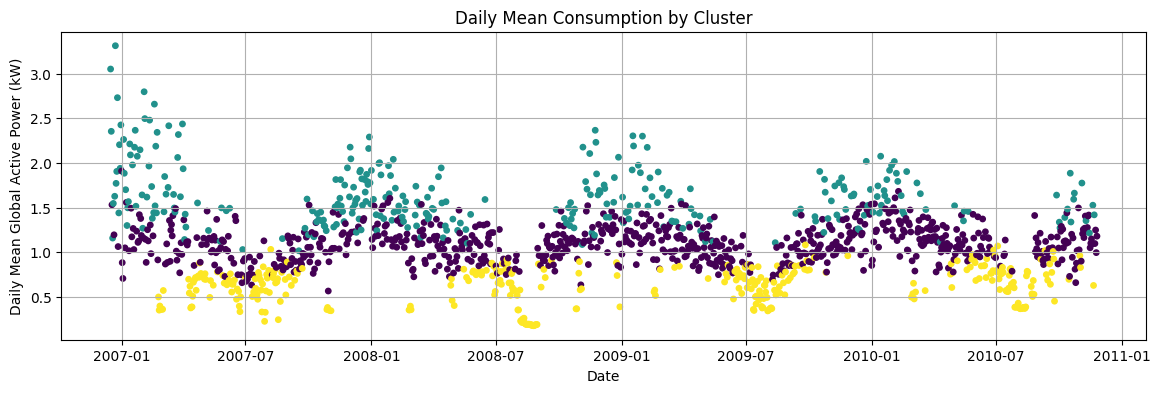

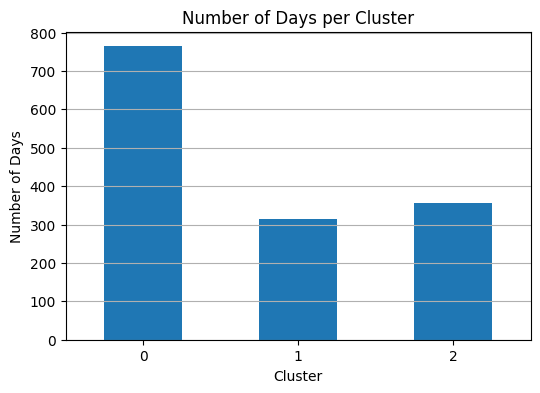


📊 Cluster Characteristics (based on daily profiles):

Cluster 0 → Medium-Usage Days
  Avg Daily Mean Power : 1.094 kW
  Avg Daily Max Power  : 5.470 kW
  Avg Daily Min Power  : 0.212 kW
  Avg Daily Std (var.) : 0.921 kW

Cluster 1 → High-Usage Days
  Avg Daily Mean Power : 1.627 kW
  Avg Daily Max Power  : 7.305 kW
  Avg Daily Min Power  : 0.233 kW
  Avg Daily Std (var.) : 1.326 kW

Cluster 2 → Low-Usage Days
  Avg Daily Mean Power : 0.614 kW
  Avg Daily Max Power  : 3.480 kW
  Avg Daily Min Power  : 0.151 kW
  Avg Daily Std (var.) : 0.556 kW

✅ Task 3 Completed: anomalies detected, clusters formed, visualized, and interpreted.


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)

df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df['Global_active_power'] = df['Global_active_power'].astype(float)

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df = df.sort_values('DateTime')


df_hourly = (
    df.set_index('DateTime')
      .resample('H')['Global_active_power']
      .mean()
      .dropna()
      .to_frame()
)

print("Hourly rows used for unsupervised learning:", len(df_hourly))


iso = IsolationForest(contamination=0.03, random_state=42)
df_hourly['anomaly'] = iso.fit_predict(df_hourly[['Global_active_power']])

# IsolationForest returns -1 for anomaly, 1 for normal → convert to 1/0
df_hourly['anomaly'] = df_hourly['anomaly'].replace({1: 0, -1: 1})

num_anomalies = df_hourly['anomaly'].sum()
print(f"\n🔍 Anomaly Detection:")
print(f"Total anomalies detected (hourly): {num_anomalies}")

# Plot hourly consumption with anomalies highlighted
plt.figure(figsize=(14,4))
normal = df_hourly[df_hourly['anomaly'] == 0]
anomalies = df_hourly[df_hourly['anomaly'] == 1]

plt.plot(normal.index, normal['Global_active_power'], label="Normal", linewidth=0.7)
plt.scatter(anomalies.index, anomalies['Global_active_power'], color='red', s=10, label="Anomaly")
plt.title("Hourly Global Active Power with Anomalies Highlighted")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(True)
plt.show()



# Build daily consumption profiles (mean, max, min, std)
df_daily = (
    df.set_index('DateTime')
      .resample('D')['Global_active_power']
      .agg(['mean', 'max', 'min', 'std'])
      .dropna()
)

df_daily.columns = ['daily_mean', 'daily_max', 'daily_min', 'daily_std']

print("\nDaily rows used for clustering:", len(df_daily))

# Scale features for clustering
scaler = StandardScaler()
X_daily = scaler.fit_transform(df_daily)

# KMeans clustering into 3 clusters: low / medium / high use
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily['cluster'] = kmeans.fit_predict(X_daily)


# Scatter: daily_mean vs date, colored by cluster
plt.figure(figsize=(14,4))
plt.scatter(df_daily.index, df_daily['daily_mean'], c=df_daily['cluster'], cmap='viridis', s=15)
plt.title("Daily Mean Consumption by Cluster")
plt.xlabel("Date")
plt.ylabel("Daily Mean Global Active Power (kW)")
plt.grid(True)
plt.show()

# Bar chart: count of days per cluster
plt.figure(figsize=(6,4))
df_daily['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Days per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Days")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



print("\n📊 Cluster Characteristics (based on daily profiles):")

cluster_stats = df_daily.groupby('cluster')[['daily_mean', 'daily_max', 'daily_min', 'daily_std']].mean()

# Determine relative label (low / medium / high) based on daily_mean
order = cluster_stats['daily_mean'].sort_values().index.tolist()
cluster_label_map = {
    order[0]: "Low-Usage Days",
    order[1]: "Medium-Usage Days",
    order[2]: "High-Usage Days"
}

for cluster_id, row in cluster_stats.iterrows():
    label = cluster_label_map[cluster_id]
    print(f"\nCluster {cluster_id} → {label}")
    print(f"  Avg Daily Mean Power : {row['daily_mean']:.3f} kW")
    print(f"  Avg Daily Max Power  : {row['daily_max']:.3f} kW")
    print(f"  Avg Daily Min Power  : {row['daily_min']:.3f} kW")
    print(f"  Avg Daily Std (var.) : {row['daily_std']:.3f} kW")

print("\n Task 3 Completed: anomalies detected, clusters formed, visualized, and interpreted.")


**Task 4 — AI Task (Simple Rule-Based AI)**

In [ ]:

predicted_value = float(y_pred[-1])

def classify_usage(power):
    if power < 1.0:
        return "Low Usage", "Energy consumption is very low. Most appliances are turned off — good energy efficiency."
    elif power < 3.0:
        return "Medium Usage", "Energy usage is normal. Continue regular appliance usage."
    else:
        return "High Usage", "High power consumption detected! Turn off heavy appliances (AC, heater, geyser) to reduce your electricity bill."


category, suggestion = classify_usage(predicted_value)


print("===== AI Consumption Category Generator =====")
print(f"Predicted Global Active Power : {predicted_value:.3f} kW")
print(f"Usage Category                : {category}")
print(f"Suggestion                    : {suggestion}")
print("=============================================")


===== AI Consumption Category Generator =====
Predicted Global Active Power : 1.043 kW
Usage Category                : Medium Usage
Suggestion                    : Energy usage is normal. Continue regular appliance usage.
